### Align the reads to the human genome
1>Using bowtie2 command on the terminal to map the reads to the human genome.  
2>Remove any contamination.  
##### The detailed codes used in the terminal are shown below.  
##### bowtie2 -p 4 --very-fast -- no-unal-x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S humangenome_align.sam --ungenome_align.sam --un humangenome_unaligned.fastq
-x specifies the path to the database you want to align your reads to. 
In this case, the database containing the human genome (data/hg19/hg19) 

-U specifies the path to your input reads in FASTQ format.
In this case, the input read is the read from the sequencing run at (data/lab6/illumina_reads.fastq)

-S specifies the path to the output SAM file 

--un tells Bowtie to dump the reads that couldn’t be aligned into a separate FASTQ file.


#### The result 
be131-12@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S humangenome_align.sam --un humangenome_unaligned.fastq  
1124714 reads; of these:  
  
  1124714 (100.00%) were unpaired; of these:  
    
    1028379 (91.43%) aligned 0 times  
    
    87274 (7.76%) aligned exactly 1 time  
    
    9061 (0.81%) aligned >1 times  
8.57% overall alignment rate

#### Analysis:
In all the reads, there are is 7.76% aligned 1 time with human genome and 0.81% aligned > 1 time. So the percentage of the sequencing library came from contaminating human DNA is totally 8.57%.

As the result, the output humangenome_align.sam file contains 8.57% aligned human genome, which is the contaminated DNA. And the unaligned humangenome fastq file filtered out the part we want. 

### Align the reads to the S. oneidensis reference genome
1> Using the filtered reads obtained in the first step as input.  
2> The Shewanella reference genome serves as a database.  
3> Makes alignment  
The detailed codes and results are presented below.

### The result ran under very-fast condition
be131-12@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U humangenome_unaligned.fastq -S shewanella_aligned.sam --un shewanella_unaligned.fastq
1028379 reads; of these:  
  
  1028379 (100.00%) were unpaired; of these:
    
    299560 (29.13%) aligned 0 times
    
    687571 (66.86%) aligned exactly 1 time
    
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

### The result ran under very-sensitive condition
be131-12@meowth:~$ bowtie2 -p 4 --very-sensitive --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U humangenome_unaligned.fastq -S shewanella_aligned.sam --un shewanella_unaligned.fastq
1028379 reads; of these:  
    
  1028379 (100.00%) were unpaired; of these:
    
    298112 (28.99%) aligned 0 times
    
    688180 (66.92%) aligned exactly 1 time
    
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate



#### Analysis
The shewanella_aligned.sam contains human genome reads that are aligned to the S. oneidensis (70.87%, which is the one we want). And the shewanella_unaligned.fastq filtered the library does not aligned with S. oneidensis genome (29.13%) 

After we changed to the very-sensitive mode, the precentage of the alignment increases to 71.01%. 

### Generate a coverage plot  
1.Convert SAM file got from the previous step to BAM, sort it, index it, and use “depth” to generate a file containing the depth of coverage for every position in the reference genome.
#### The codes used in the terimal 
samtools view -b shewanella_aligned.sam > shewanella_aligned.bam  

samtools sort shewanella_aligned.bam > shewanella_aligned.sorted.bam 

samtools index shewanella_aligned.sorted.bam     

samtools depth -a shewanella_aligned_sorted.bam > pileup.tab  


#### Four output files had been generated in the sequence as below:
shewanella_aligned.bam  
shewanella_aligned_sorted.bam  
shewanella_aligned_sorted.bam.bai  
pileup.tab

2.upload the depth file into iPython and use matplotlib to generate a plot
where the x-axis is position in the genome and the y-axis is depth of coverage.

3.using the same data, generate a coverage histogram to see what the distribution of coverage
depth looks like.

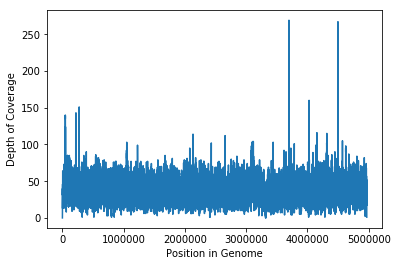

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
x, y = [], []
#data=open('pileup.tab','r')

# Get the data from the depth file, x is the position in the genome, and y is the depth of converage 
with open('pileup.tab','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for i in plots:
        x.append(int(i[1]))   
        y.append(int(i[2])) 

plt.plot(x,y)
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.show()

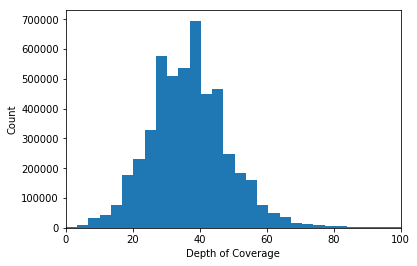

The minimum coverage: 
0
The maximum coverage: 
269
The average coverage: 
36.955644792125895


In [2]:
# plot the histogram plot 
num_bins = 80
plt.xlim([0,100])

plt.hist(y, num_bins)
plt.ylabel('Count')
plt.xlabel('Depth of Coverage')
plt.show()
print("The minimum coverage: ")
print(min(y))
print("The maximum coverage: ")
print(max(y))
print("The average coverage: ")
print(np.mean(y))

#### Analysis:
After the calculation, we found out that the minimum coverage value is 0, maximum is 269, and the mean is around 37 across all positions in genome. There are 2 peaks of depth of coverage which appear between position 3000000 and 5000000 in genome. 
The histrogram graph shows the distrubution of the depth of coverage. Most counts appear at deapth of coverage= 40, and the count is nearly 700000.

### Extra Credit1: 

1.Convert human SAM file got from the previous step to BAM, sort it, index it, and use “depth” to generate a file containing the depth of coverage for every position in the reference genome.
#### The codes used in the terimal 
samtools view -b humangenome_align.sam > humangenome_align.bam 

samtools sort humangenome_align.bam > humangenome_aligned_sort.bam  

samtools index humangenome_aligned_sort.bam     

samtools depth humangenome_aligned_sort.bam > SApileup.tab 


#### Four output files had been generated in the sequence as below:
humangenome_align.bam  
humangenome_aligned_sort.bam  
humangenome_aligned_sort.bam.bai  
SApileup.tab 

2.upload the depth file into iPython and use matplotlib to generate a plot average depth (total depth / length of chromosome) for each human
chromosome: chr1-22, X, and Y.

3.using the same data, generate a coverage histogram to see what the distribution of coverage
depth looks like.
    

In [3]:
# Getting data from the human genome
totalDepth={}
totalChro={}
average=[]
data=open('SApileup.tab','r')
# Get the data from the depth file, x is the position in the genome, and y is the depth of converage 
x,y=[],[]
for i in data.readlines():
    i=i.strip()
    columns=i.split()
    x.append(int(columns[1]))
    y.append(int(columns[2]))
    if len(columns[0])<=5:
        totalDepth[columns[0]]=totalDepth.get(columns[0],0)+int(columns[2])
        totalChro[columns[0]]=totalChro.get(columns[0],0)+1



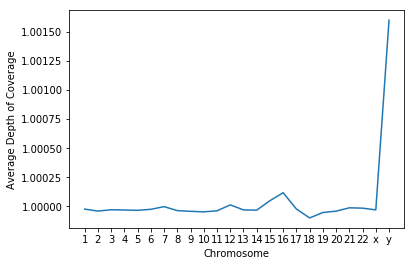

The total length  of the Jamie's X-chromosome:
1508504
The total length  of the Jamie's Y-chromosome:
244099


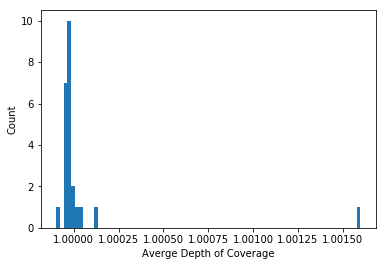

In [4]:
#A plot average depth (total depth / length of chromosome) for each human chromosome: chr1-22, X, and Y.
Depth=[depth for depth in totalDepth.values()]
Chrototal=[chro for chro in totalChro.values()]
Average=[]
Xlabel=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','x','y']
for i in range(len(Depth)):
    Average.append(Depth[i]/Chrototal[i])
plt.plot(Xlabel,Average)
plt.ylabel('Average Depth of Coverage')
plt.xlabel('Chromosome')
plt.show()

print('The total length  of the Jamie\'s X-chromosome:')
print(Chrototal[22])
print('The total length  of the Jamie\'s Y-chromosome:')
print(Chrototal[23])


#Generate a coverage histogram to see what the distribution of coverage depth looks like.
num_bins = 80
plt.hist(Average, num_bins)
plt.ylabel('Count')
plt.xlabel('Averge Depth of Coverage')
plt.show()

### Analysis
From the data presented above, Jamie is a male which contains Y chromosome. However, the total length of his X chromosome(1508504) is much greath than the total length of his Y-chromosome(244099). Sincce the result from the Researchgat, the normal ratio of the X to Y is 2.61: 1. We suspect that his sexual chromosom is XXY. 

Based on the data obtained from the histogram, most the average depth of coverage distrubute within 1.0 range. There is one outlier. Its average depth of coverage is around 1.0015. This could results from the high value of the total length of the X-chromosome. 


#### Extra Credit 2: 
Try to “zoom in” on regions that seem to have higher coverage than average. Can you figure out what genes are in those regions? You’ll have to extract the sequence from those regions and BLAST it.

In [5]:
import math
# compute the average depth of all chromosomes
ave_total_depth=sum(Depth)/sum(Chrototal)
# print the total average
print("Average depth of all chromosomes is {}".format(ave_total_depth))
print("Get the ceiling of the total average, so the average is {}".format(math.ceil(ave_total_depth)))
# Based on the calculation, the average is 1, create a list storing the position greater than average depth
greater1=[];
for i in range(len(y)):
    if y[i] > math.ceil(ave_total_depth):
        greater1.append(x[i])
        
# create the list to store the start and end position of each gene at the greater1 list
start, end = [0], []
for i in range(1, len(greater1)):
    if abs(greater1[i] - greater1[i-1]) > 1:
        start.append(i)
        end.append(i-1)
end.append(len(greater1)-1)

greaterThanAvgPos = []
for i in range(len(start)):
    greaterThanAvgPos.append(greater1[start[i]])
print("The position of the gene greater than average:")
print(greaterThanAvgPos)




Average depth of all chromosomes is 0.9999902623705493
Get the ceiling of the total average, so the average is 1
The position of the gene greater than average:
[84306892, 45285619, 30510261, 34688969, 33097974, 18485047, 27170225]


After we get the position of the gene we interest at, we can read it into the human genome file

In [6]:
# read in the output_human.sam file
infile = open("humangenome_align.sam", "r")
res = []

for line in infile.readlines():
    for i in greaterThanAvgPos:
        if str(i) in line:
            print(line)
            res.append(line)

read77943	16	chrY	18485047	1	300M	*	0	0	TTGTAAACTCTTACAATGAACTCATAAAGTTAGAACAAAGTTAAAAATAATTGCTATCTAAGTATCAGAGTTAGAATAAATTATTCCCAAGGTTTCCCCTCACTTTAAGTTTCCCTGATTCTTGTATTTTTTACTTAAATTGGATATACAATTACTATTTTTTCATTATTTAATTCATAATACATTTGGTAAAATAATTTCTTTTTAAGTAAAACATTTAATAGTGCAGTTTGGTTCGTGTTAATTATACTTCAACGAACCCCTTATGTTACTTGCCTAGTGACAGAGTATGTGGGTAAA	BGFGFB5=>@GFFFG'GFFGEAFFGCF4=>FFFG1D@<BD7@4E?F0DCGEGFFGGC7>:>CDG-GFGGAGGGGGEGGFB=FEGFFGFGCGEEFGEGFFGG?FFBCGAGGGEEGGGAGGDGDG@?GD/EGFGF-<:FDFGG46G9GFFAFFGFGGGFGGCGE&FGFGFGGGEGG>DFG(EEGGGFEGG:DFGGGFGGGFG:GGGGGFGFBEGAFCCFFGGFEGGGGGGGGGG7AEFEGFFGCGGG;GGGGDFFFEG:GGEEFFGGEGGGGDGEC<FGAGCGG6GFGBD4EGGGGCGGGFG	AS:i:-5	XS:i:-5	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:154T145	YT:Z:UU

read334190	16	chr15	30510261	1	300M	*	0	0	TGCCTTTTTGTAACTTAATCTCAGAAGTGACATCTGCTGTGTTCTGTATGTTAGAAGTGAGTCACTAAGTCCAGCTGAAACTCAGGGGAGGGCTTGCCTACCAGGAGGCAGGAATCACCAGGACCCATCAGAGACACCGTCTACCCCAGTCTGTGCTCGGGTCCTTCATGTCTCTCCCTCCTGAAATTTGATAGATTCTGCAAAAGAAAAAGCCTTGATCCACGCTGCTTTCTAGAATGTTGT

#### Apply the manual blast at the NCBI 
read77943	16	chrY	18485047	1	300M	*	0	0	TTGTAAACTCTTACAATGAACTCATAAAGTTAGAACAAAGTTAAAAATAATTGCTATCTAAGTATCAGAGTTAGAATAAATTATTCCCAAGGTTTCCCCTCACTTTAAGTTTCCCTGATTCTTGTATTTTTTACTTAAATTGGATATACAATTACTATTTTTTCATTATTTAATTCATAATACATTTGGTAAAATAATTTCTTTTTAAGTAAAACATTTAATAGTGCAGTTTGGTTCGTGTTAATTATACTTCAACGAACCCCTTATGTTACTTGCCTAGTGACAGAGTATGTGGGTAAA	
Result: Homo sapiens BAC clone RP11-455E3 from Y, complete sequence

read334190	16	chr15	30510261	1	300M	*	0	0	TGCCTTTTTGTAACTTAATCTCAGAAGTGACATCTGCTGTGTTCTGTATGTTAGAAGTGAGTCACTAAGTCCAGCTGAAACTCAGGGGAGGGCTTGCCTACCAGGAGGCAGGAATCACCAGGACCCATCAGAGACACCGTCTACCCCAGTCTGTGCTCGGGTCCTTCATGTCTCTCCCTCCTGAAATTTGATAGATTCTGCAAAAGAAAAAGCCTTGATCCACGCTGCTTTCTAGAATGTTGTAGTGAAAAGCAAGTCAGTGTGGTACATTCAGAGTAATTTTATAATTTTATAATTTAA
Result: Homo sapiens BAC clone CH17-311D18 from chromosome 15, complete sequence

read507912	16	chrY	27170225	1	300M	*	0	0
ATGTCCTGTTTTTACGTGTGACAGTTGGCTGCAACCATGTGGGATGATGACAGTTATTTCTGTCAGCTGGGTTTGCATACAGGACTCACAATTTCACCTGTGTGCTGAGTGCTACATTGGTTCTGCTTGTATAACCCAAAGACTCTATAAAAGTATGTGTCAATGTTGTAATCTTTTGTGATGTTTGTACAAGAATGTGATCCATGATATCACACATGTCCCTACACCTAGTTATAAGAGCCTAAATATTCTCTATTTGCTGAGTTCACATCTAAGAGTCGTTATCATTCCTGCGAGCCT
Result: Homo sapiens chromosome Y palindromes P1, P2, P3 and inverted repeat IR2 (P1-P2-P3-IR2@) on chromosome Y

read515325	0	chr12	45285619	42	300M	*	0	0	AATTGGGTAGAATATGGTTCCATCCCCTGCCTTGAGAGGATCTCAGAACAATATGTTTTGCTAATTATGCAAATATATTTATCAACTGTATGAGTAAAGTAGCCTATAATTTAAAGACTGAGGACTTGTTTTCAAACACATCACAGTAATGAAATGAGCCTATTCCAACAGTATATTCATGGTGCTATGGTTTCCTTTCTAAGCATGGTGATTGTTTCACACTGGGCAAGACATCTGGTGAAGTTGAGAGGCTGTCACCCAGCTGAGAGAATATGTGCATGGTTGGGAGTAGAATTTCCT
Result:Homo sapiens 12 BAC RP11-453L7 (Roswell Park Cancer Institute Human BAC Library) complete sequence

read781959	16	chr16	33097974	1	300M	*	0	0	AGGTCAAACGAAACACCTAACATTGCTAGGGCAGCCTCCCACAACAAAGAATCCTCTGGTCCTAAAGGTAAGTAGCACCAAGATTGAGAAACCATAATCTAGACAGGAAACACTACGTAGCTATTCCAAGTGCGCAGGAAAGCACATCAGTGCCCTCGAGGGGAAAAGTGTAAACATTTTAATTGCTGTACATGGTGACACAAATCCATGTTGTTAATCTAAGTGGAAGGGGCTGAAGCACAAAACATAATTCAAAGAGTTTACTTGAGCCACAATGAGGACAGCTGCCTGGAAGAAACA
Result:Homo sapiens chromosome 16 clone RP11-19N8, complete sequence

read854980	0	chr7	84306892	42	300M	*	0	0	TTGTGCTTTGGCAACATTTGTTGTTGTTTGTGAATCACAGCTATGTTCAGTGGTATGTGACTTGCCTCTCGGCACCCAGGAGGCATCAGCAAAAACACCTGTGGCCCAATAAACCACAATTTTTGGGTCCAGTAAATTGGTCAATACACAGCCCACACCAAAATATCACTGAATTTGGCTTTGTATATTTGGTCATTTGATAACCATTCTGCAAAACTGACCCAATTTTTACTGGTTAAAGAACAATATTGCAGGAAAGTAGAGGCAGACAGCTTTTTAAGTCCTTTAAAATGATACAAC
Result: Homo sapiens BAC clone RP11-750F10 from 7, complete sequence

read1019002	0	chr15	34688969	1	300M	*	0	0	TATTTTAGACCTCATTCTGATCTCCCTCTCCCCGCCAACCCCACCAACTTCTGCCCTGTCATTTATCCTCATATCTCTCTGTGTAACATATTGACTTACTTTTTGGAGATAATGGTCTAACCAATTAATCCTTTCTTCTGGTGTCTAATCCATCCACTCGGTTTCTTATTTCAACAATTCCATTTTATATTTCCTTATTTCATTTTATTCTGAGACAGAGTCTCACTCTGTCACCCAGGCTGGACTGTAGTGGCACGAACCTGCAGCCCTGGCCTCCTGGGCTCAAGTGATCCTCCCACC
Result:Select seq AC277885.1 Homo sapiens chromosome 15 clone CH17-113G17, complete sequence